In [1]:
# Importing pandas to load the data
import pandas as pd
import numpy as np


In [2]:
#ls

In [3]:
# Reading the data using pandas.read_csv()
data = pd.read_csv('breast-cancer.csv')
#Reading the first 5 samples
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Checking for missing values using the .isna() method
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#Checkig the information of the data using the .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Dividing the data into features(X) and targets(y)
X = data.drop(['diagnosis','id'], axis = 1)
y = data['diagnosis']


The benign and malignant cases are: 357 and 212 respectively


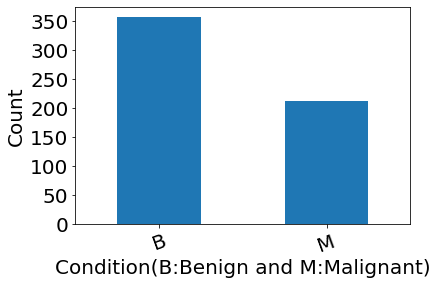

In [7]:
# Checking the distribution of the target 
import matplotlib.pyplot as plt
y.value_counts().plot(kind = 'bar', fontsize = 20, rot = 20)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Condition(B:Benign and M:Malignant)', fontsize = 20)
b= len(y[y=='B']) # using boolean array to filter the benign cases
m = len(y[y=='M']) # using boolean array to filter the malignant cases
print(f"The benign and malignant cases are: {b} and {m} respectively")

### Feature selection
Here feature selection is carried out using random forest 

In [8]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# Import the RandomForestClassifier from the ensemble package of the sklearn
from sklearn.ensemble import RandomForestClassifier

In [10]:
# instantiating an object of the RandomForestClassifier and training it
model = RandomForestClassifier().fit(X,y)
#Extracting the feature importance 
model.feature_importances_
#Extracting the names of the columns of the features
model.feature_names_in_
#Creating a dataframe for the series of feature importance 
feature_importance = pd.DataFrame(data = np.round(model.feature_importances_*100,3),index = model.feature_names_in_, columns = ['Percentage importance'] )
#sorting the values in decending order and finding the cummulativies
feature_df=feature_importance.sort_values(by=['Percentage importance'], ascending = False)
feature_df['Cummulative percentage importance']=np.round(feature_df['Percentage importance'].cumsum(),3)
feature_df

,Percentage importance,Cummulative percentage importance
perimeter_worst,15.150,15.150
area_worst,14.879,30.029
concave points_worst,10.170,40.199
concave points_mean,9.120,49.319
radius_worst,7.617,56.936
area_se,6.510,63.446
concavity_mean,5.177,68.623
concavity_worst,3.822,72.445
radius_mean,3.813,76.258
perimeter_mean,3.808,80.066


In [11]:
# Features representing 60% information 
features60 = feature_df[feature_df['Cummulative percentage importance']<=60.01]
features60
print(len(features60.index))

5


In [12]:
# Features representing 70% information 
features70 = feature_df[feature_df['Cummulative percentage importance']<=70.01]
features70
print(len(features70.index))

7


In [13]:
# Features representing 80% information 
features80 = feature_df[feature_df['Cummulative percentage importance']<=83.86]
features80
print(len(features80.index))

11


In [14]:
# Features representing 90% information 
features90 = feature_df[feature_df['Cummulative percentage importance']<=91.00]
features90
print(len(features90.index))

16


In [15]:
feature_df.index

Index(['perimeter_worst', 'area_worst', 'concave points_worst',
       'concave points_mean', 'radius_worst', 'area_se', 'concavity_mean',
       'concavity_worst', 'radius_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'compactness_worst', 'texture_worst', 'radius_se',
       'smoothness_worst', 'compactness_mean', 'texture_mean',
       'symmetry_worst', 'concave points_se', 'smoothness_mean',
       'fractal_dimension_worst', 'smoothness_se', 'concavity_se',
       'fractal_dimension_se', 'symmetry_se', 'symmetry_mean', 'texture_se',
       'compactness_se', 'fractal_dimension_mean'],
      dtype='object')

In [16]:
#length of total number of features
print(len(feature_df.index))

30


In [17]:
features60.index

Index(['perimeter_worst', 'area_worst', 'concave points_worst',
       'concave points_mean', 'radius_worst'],
      dtype='object')

The features that represent 60% of the target are 6 namely:
'area_worst', 'perimeter_worst', 'radius_worst', 'concave points_worst',
       'concave points_mean'

The features that represent 70% of the target are 6 namely:
'area_worst', 'perimeter_worst', 'radius_worst', 'concave points_worst',
       'concave points_mean', 'radius_mean'

The features that represent 80% of the target are 10 namely:
'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'
      
The features that represent 90% of the target are 15 namely:
'perimeter_worst', 'area_worst', 'concave points_worst',
       'concave points_mean', 'radius_worst', 'concavity_mean', 'area_mean',
       'perimeter_mean', 'radius_mean', 'area_se', 'concavity_worst',
       'texture_worst', 'texture_mean', 'compactness_worst',
       'smoothness_worst'
       
The total number of features in the dataset are 30 and are listed here: 'perimeter_worst', 'area_worst', 'concave points_worst',
       'concave points_mean', 'radius_worst', 'concavity_mean', 'area_mean',
       'perimeter_mean', 'radius_mean', 'area_se', 'concavity_worst',
       'texture_worst', 'texture_mean', 'compactness_worst',
       'smoothness_worst', 'compactness_mean', 'concave points_se',
       'perimeter_se', 'radius_se', 'concavity_se', 'symmetry_worst',
       'fractal_dimension_worst', 'smoothness_mean', 'compactness_se',
       'symmetry_mean', 'texture_se', 'symmetry_se', 'smoothness_se',
       'fractal_dimension_se', 'fractal_dimension_mean'      


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# feature extraction
# Here we are training with all the features
X_all = X # all the features
X_60 = X[features60.index]
X_70 = X[features70.index]
X_80 = X[list(features80.index)] # features that explaned 80% importance
X_90 = X[list(features90.index)]
# features that explaned 90% importance
X = X_all
#X = X_60
#X = X_70
#X = X_80
#X = X_90 

In [42]:
# Transforming the target from categorical to numerical
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Spliting the dataset 

In [21]:
# importing train_test_split from the model selection package of sklearn
from sklearn.model_selection import train_test_split

In [22]:
# Spliting the dataset into 80% training set and 20% testing set  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Scaling the training feature set using the MinMaxScaler()  and StandardScaler() methods


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler() # creating an object of the MinMaxScaler
sc = StandardScaler()
scaler = mms
#scaler = sc

#transforming the dataset 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the machine learning model

In [24]:
# Importing the necessary machine learning algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [25]:
# Assigning all the models into a list for comparison 
models = [LogisticRegression(),SVC(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),
          RandomForestClassifier()]

In [26]:
# Creating a dictionary to save the performance of the models from the crossvalidation
dict_models = {}
# The number of fold has been set to 10
for model in models:
    scores=cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    dict_models[model.__class__.__name__] = scores
# Creating a dataframe for the accuracy of the model    
df_model = pd.DataFrame(dict_models)  
df_model.describe()



,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.962609,0.978019,0.960386,0.927391,0.929807,0.958164
std,0.027716,0.020840,0.034168,0.040546,0.043391,0.032030
min,0.911111,0.933333,0.888889,0.844444,0.847826,0.888889
25%,0.940217,0.977778,0.955797,0.911111,0.911594,0.939976
50%,0.977778,0.978261,0.977778,0.934300,0.923913,0.966667
75%,0.978261,0.994565,0.978140,0.956522,0.972222,0.978140
max,1.000000,1.000000,1.000000,0.977778,0.978261,1.000000


In [27]:
df_model.describe().loc['75%'] - df_model.describe().loc['25%'] 

LogisticRegression        0.038043
SVC                       0.016787
KNeighborsClassifier      0.022343
GaussianNB                0.045411
DecisionTreeClassifier    0.060628
RandomForestClassifier    0.038164
dtype: float64

Text(0, 0.5, 'Accuracy')

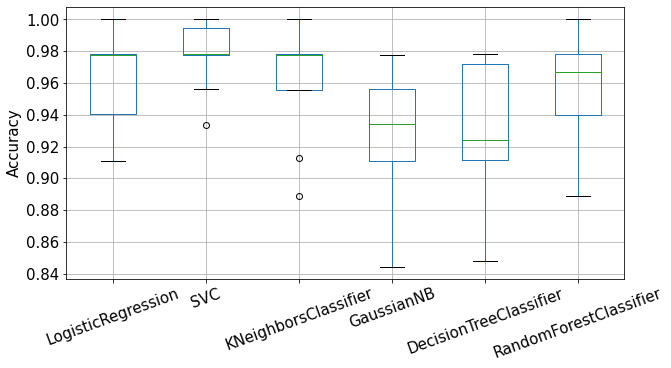

In [28]:
# Creating a box plot for the accuracy score 
ax=df_model.boxplot(figsize = (10,5),rot = 20, fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15) 

In [29]:
# The procedure is repeated for the precision score
dict_models = {}
for model in models:
    scores=cross_val_score(model,X_train,y_train,scoring = 'precision',cv = 10)
    dict_models[model.__class__.__name__] = scores
df_model = pd.DataFrame(dict_models) 
df_model.describe()


,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.994118,0.994444,0.970588,0.922969,0.903586,0.975229
std,0.018602,0.017568,0.041595,0.067369,0.093058,0.032144
min,0.941176,0.944444,0.882353,0.833333,0.736842,0.933333
25%,1.000000,1.000000,0.941176,0.863445,0.837500,0.941993
50%,1.000000,1.000000,1.000000,0.941176,0.937255,1.000000
75%,1.000000,1.000000,1.000000,0.985294,0.985294,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_model.describe().loc['75%'] - df_model.describe().loc['25%'] 

LogisticRegression        0.000000
SVC                       0.000000
KNeighborsClassifier      0.058824
GaussianNB                0.121849
DecisionTreeClassifier    0.147794
RandomForestClassifier    0.058007
dtype: float64

Text(0, 0.5, 'Precision')

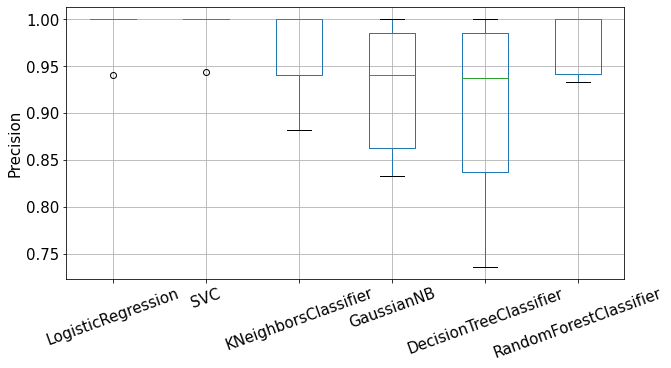

In [31]:
# Creating a box plot for the precision score 
ax = df_model.boxplot(figsize = (10,5),rot = 20, fontsize = 15)
ax.set_ylabel('Precision', fontsize = 15)

In [32]:
# The procedure is repeated for the recall score
dict_models = {}
for model in models:
    scores=cross_val_score(model,X_train,y_train,scoring = 'recall',cv = 10)
    dict_models[model.__class__.__name__] = scores
df_model = pd.DataFrame(dict_models)  
df_model.describe()


,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.905882,0.947059,0.923529,0.881985,0.911765,0.935294
std,0.074407,0.058496,0.083420,0.082908,0.084337,0.058496
min,0.764706,0.823529,0.705882,0.705882,0.764706,0.823529
25%,0.852941,0.941176,0.941176,0.882353,0.838235,0.897059
50%,0.941176,0.941176,0.941176,0.909926,0.941176,0.941176
75%,0.941176,1.000000,0.941176,0.941176,0.985294,0.985294
max,1.000000,1.000000,1.000000,0.941176,1.000000,1.000000


In [33]:
df_model.describe().loc['75%'] - df_model.describe().loc['25%'] 

LogisticRegression        0.088235
SVC                       0.058824
KNeighborsClassifier      0.000000
GaussianNB                0.058824
DecisionTreeClassifier    0.147059
RandomForestClassifier    0.088235
dtype: float64

Text(0, 0.5, 'Recall')

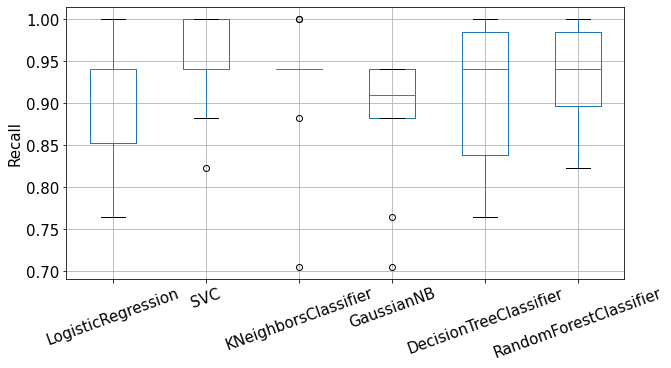

In [34]:

ax=df_model.boxplot(figsize = (10,5),rot = 20, fontsize = 15)
ax.set_ylabel('Recall', fontsize = 15)
#ax.set_xlabel(x_labels,fontsize = 20)

In [35]:
# The procedure is repeated for the f1 score
dict_models = {}
for model in models:
    scores=cross_val_score(model,X_train,y_train,scoring = 'f1',cv = 10)
    dict_models[model.__class__.__name__] = scores
df_model = pd.DataFrame(dict_models) 
np.round(df_model.describe(),3)


,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
count,10.000,10.000,10.000,10.000,10.000,10.000
mean,0.946,0.969,0.944,0.899,0.906,0.954
std,0.042,0.030,0.051,0.058,0.074,0.037
min,0.867,0.903,0.828,0.774,0.774,0.875
25%,0.913,0.970,0.941,0.871,0.898,0.946
50%,0.970,0.970,0.970,0.910,0.925,0.970
75%,0.970,0.993,0.970,0.941,0.963,0.970
max,1.000,1.000,1.000,0.970,0.971,1.000


In [36]:
np.round(df_model.describe().loc['75%'] - df_model.describe().loc['25%'],3) 

LogisticRegression        0.057
SVC                       0.023
KNeighborsClassifier      0.029
GaussianNB                0.071
DecisionTreeClassifier    0.065
RandomForestClassifier    0.024
dtype: float64

Text(0, 0.5, 'f1_score')

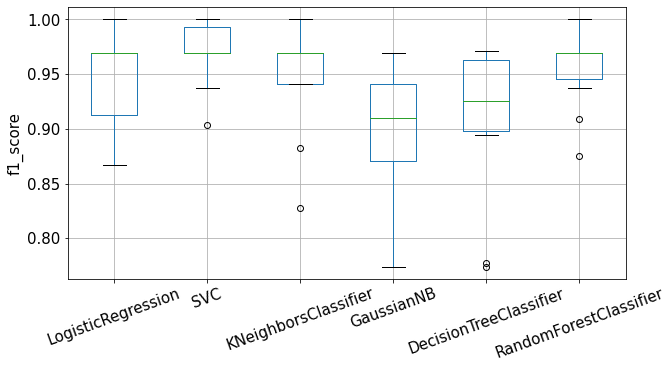

In [37]:
ax=df_model.boxplot(figsize = (10,5),rot = 20, fontsize = 15)
ax.set_ylabel('f1_score', fontsize = 15)
#ax.set_xlabel(x_labels,fontsize = 20)

## Using an esemble for all the algorithm to create the final model

In [38]:
#importing the metrics for evaluation 
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [39]:
# creating a variable called models for all the model 
models = [('lr',LogisticRegression()),('svc',SVC(probability = True)),('knn',KNeighborsClassifier()),('gn',GaussianNB()),('dtc',DecisionTreeClassifier()),
          ('rf',RandomForestClassifier(n_estimators=100))]
#models = [('lr',LogisticRegression()),('svc',SVC(probability = True)),('knn',KNeighborsClassifier()),('rf',RandomForestClassifier(n_estimators=200))]
#models = [('lr',LogisticRegression()),('svc',SVC(probability = True)),('knn',KNeighborsClassifier())]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



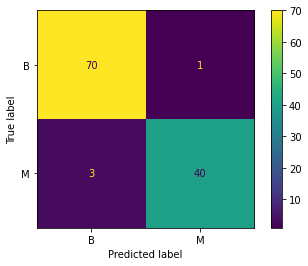

In [40]:
#Creating the esemble method 
from sklearn.ensemble import VotingClassifier # using the votingclassfier
vc = VotingClassifier(models, voting='hard') # passing the models for voting
vc.fit(X_train,y_train) # training the esemble algorithm
y_pred = vc.predict(X_test) # using the trained algorithm to evaluate the test set
print(classification_report(y_test,y_pred)) # printing the classfication report
cm = confusion_matrix(y_test,y_pred) # evaluating using the confusion metrics
disp = ConfusionMatrixDisplay(cm, display_labels =le.classes_ ) #displaying the result
disp.plot()